In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:/Users/GLOBAL/Downloads/parking_prediction_dataset_v2.csv")
df.head()

,Hour,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
0,6,7,1,Clear,1,196,66,130
1,19,2,1,Cloudy,1,80,80,0
2,14,1,1,Cloudy,0,191,55,136
3,10,4,0,Clear,1,102,59,43
4,7,3,0,Cloudy,0,97,29,68


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hour              500 non-null    int64 
 1   Day_of_Week       500 non-null    int64 
 2   Is_Weekend        500 non-null    int64 
 3   Weather           500 non-null    object
 4   Nearby_Event      500 non-null    int64 
 5   Parking_Capacity  500 non-null    int64 
 6   Occupied_Spots    500 non-null    int64 
 7   Available_Spots   500 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.4+ KB


(500, 8)

In [5]:
df.isnull().sum()

Hour                0
Day_of_Week         0
Is_Weekend          0
Weather             0
Nearby_Event        0
Parking_Capacity    0
Occupied_Spots      0
Available_Spots     0
dtype: int64

In [6]:
df.describe()

,Hour,Day_of_Week,Is_Weekend,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
count,500.000000,500.000000,500.0000,500.0000,500.000000,500.000000,500.00000
mean,11.324000,3.908000,0.4800,0.5200,126.462000,55.718000,70.74400
std,7.311768,1.991851,0.5001,0.5001,45.745008,22.786771,49.21417
min,0.000000,1.000000,0.0000,0.0000,51.000000,0.000000,0.00000
25%,5.000000,2.000000,0.0000,0.0000,85.000000,39.000000,28.00000
50%,11.000000,4.000000,0.0000,1.0000,127.000000,55.000000,70.00000
75%,18.000000,6.000000,1.0000,1.0000,168.000000,72.000000,109.00000
max,23.000000,7.000000,1.0000,1.0000,199.000000,115.000000,179.00000


In [7]:
df.isnull()

,Hour,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [8]:
df['Hour'].isnull().sum()

np.int64(0)

In [9]:
df.columns

Index(['Hour', 'Day_of_Week', 'Is_Weekend', 'Weather', 'Nearby_Event',
       'Parking_Capacity', 'Occupied_Spots', 'Available_Spots'],
      dtype='object')

In [11]:
df['Hour'].unique()

array([ 6, 19, 14, 10,  7, 20, 18, 22, 23,  3,  2, 21,  1, 11,  5,  0, 16,
        9, 15,  4,  8, 17, 13, 12])

In [12]:
df["Hour"].nunique()

24

In [13]:
df['Hour'].value_counts()

Hour
0     32
2     28
15    27
21    25
6     24
19    24
22    24
4     24
7     23
11    23
23    22
1     21
16    21
18    20
14    20
20    20
3     19
8     18
13    16
12    15
9     15
5     14
17    13
10    12
Name: count, dtype: int64

In [15]:
df[df['Hour']>5]

,Hour,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
0,6,7,1,Clear,1,196,66,130
1,19,2,1,Cloudy,1,80,80,0
2,14,1,1,Cloudy,0,191,55,136
3,10,4,0,Clear,1,102,59,43
4,7,3,0,Cloudy,0,97,29,68
...,...,...,...,...,...,...,...,...
493,23,7,0,Cloudy,0,167,62,105
495,12,6,0,Cloudy,0,72,31,41
497,15,7,1,Cloudy,1,88,82,6
498,23,4,0,Rainy,0,157,61,96


In [20]:
df[(df['Hour']>5) & (df['Weather']=='Clear')]

,Hour,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
0,6,7,1,Clear,1,196,66,130
3,10,4,0,Clear,1,102,59,43
10,10,1,1,Clear,0,138,40,98
12,20,5,0,Clear,0,122,47,75
20,23,2,0,Clear,1,68,68,0
...,...,...,...,...,...,...,...,...
470,14,4,0,Clear,1,198,61,137
472,13,1,1,Clear,0,185,49,136
475,11,4,1,Clear,0,184,44,140
483,22,7,1,Clear,1,51,51,0


In [21]:
df.groupby('Hour').sum()

,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
Hour,,,,,,,
0,127,15,CloudyClearRainyRainyClearRainyClearCloudyClou...,17,4044,1080,2964
1,93,10,CloudyCloudyRainyClearClearCloudyCloudyClearCl...,9,2439,692,1747
2,107,17,RainyCloudyClearClearClearCloudyCloudyRainyRai...,17,3378,1197,2181
3,68,10,RainyCloudyRainyCloudyRainyCloudyRainyClearCle...,9,2297,721,1576
4,104,12,ClearClearCloudyCloudyClearRainyRainyRainyRain...,9,3158,942,2216
5,45,8,ClearRainyClearCloudyCloudyCloudyClearClearRai...,6,1834,577,1257
6,99,11,ClearCloudyRainyRainyCloudyCloudyRainyRainyClo...,12,3303,1120,2183
7,103,12,CloudyCloudyRainyClearRainyClearRainyRainyClou...,7,2696,987,1709
8,75,8,ClearClearClearClearRainyRainyCloudyClearCloud...,7,2302,814,1488


In [22]:
df.groupby('Hour').count()

,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
Hour,,,,,,,
0,32,32,32,32,32,32,32
1,21,21,21,21,21,21,21
2,28,28,28,28,28,28,28
3,19,19,19,19,19,19,19
4,24,24,24,24,24,24,24
5,14,14,14,14,14,14,14
6,24,24,24,24,24,24,24
7,23,23,23,23,23,23,23
8,18,18,18,18,18,18,18


In [23]:
df.groupby(['Hour','Weather']).count()

Day_of_Week  Is_Weekend  Nearby_Event  Parking_Capacity  \
Hour Weather                                                            
0    Clear             13          13            13                13   
     Cloudy             9           9             9                 9   
     Rainy             10          10            10                10   
1    Clear             10          10            10                10   
     Cloudy             8           8             8                 8   
...                   ...         ...           ...               ...   
22   Cloudy            10          10            10                10   
     Rainy              9           9             9                 9   
23   Clear              7           7             7                 7   
     Cloudy             7           7             7                 7   
     Rainy              8           8             8                 8   

              Occupied_Spots  Available_Spots  
Hour Weather                                   
0    Clear                13               13  
     Cloudy                9                9  
     Rainy                10               10  
1    Clear                10               10  
     Cloudy                8                8  
...                      ...              ...  
22   Cloudy               10               10  
     Rainy                 9                9  
23   Clear                 7                7  
     Cloudy                7                7  
     Rainy                 8                8  

[72 rows x 6 columns]

In [24]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [25]:
df_encoded.head()

,Hour,Day_of_Week,Is_Weekend,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots,Weather_Cloudy,Weather_Rainy
0,6,7,1,1,196,66,130,False,False
1,19,2,1,1,80,80,0,True,False
2,14,1,1,0,191,55,136,True,False
3,10,4,0,1,102,59,43,False,False
4,7,3,0,0,97,29,68,True,False


In [28]:
X=df_encoded.drop('Occupied_Spots',axis=1)
y=df_encoded['Occupied_Spots']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
dt=DecisionTreeClassifier()

In [31]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
y_predict=dt.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.12
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\User

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         3
          28       0.00      0.00      0.00         1
          29       0.33      0.50      0.40         2
          30       0.00      0.00      0.00         1
          31       0.00    

c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\GLOBAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\GLOBAL\AppData\

In [35]:
from sklearn.tree import plot_tree

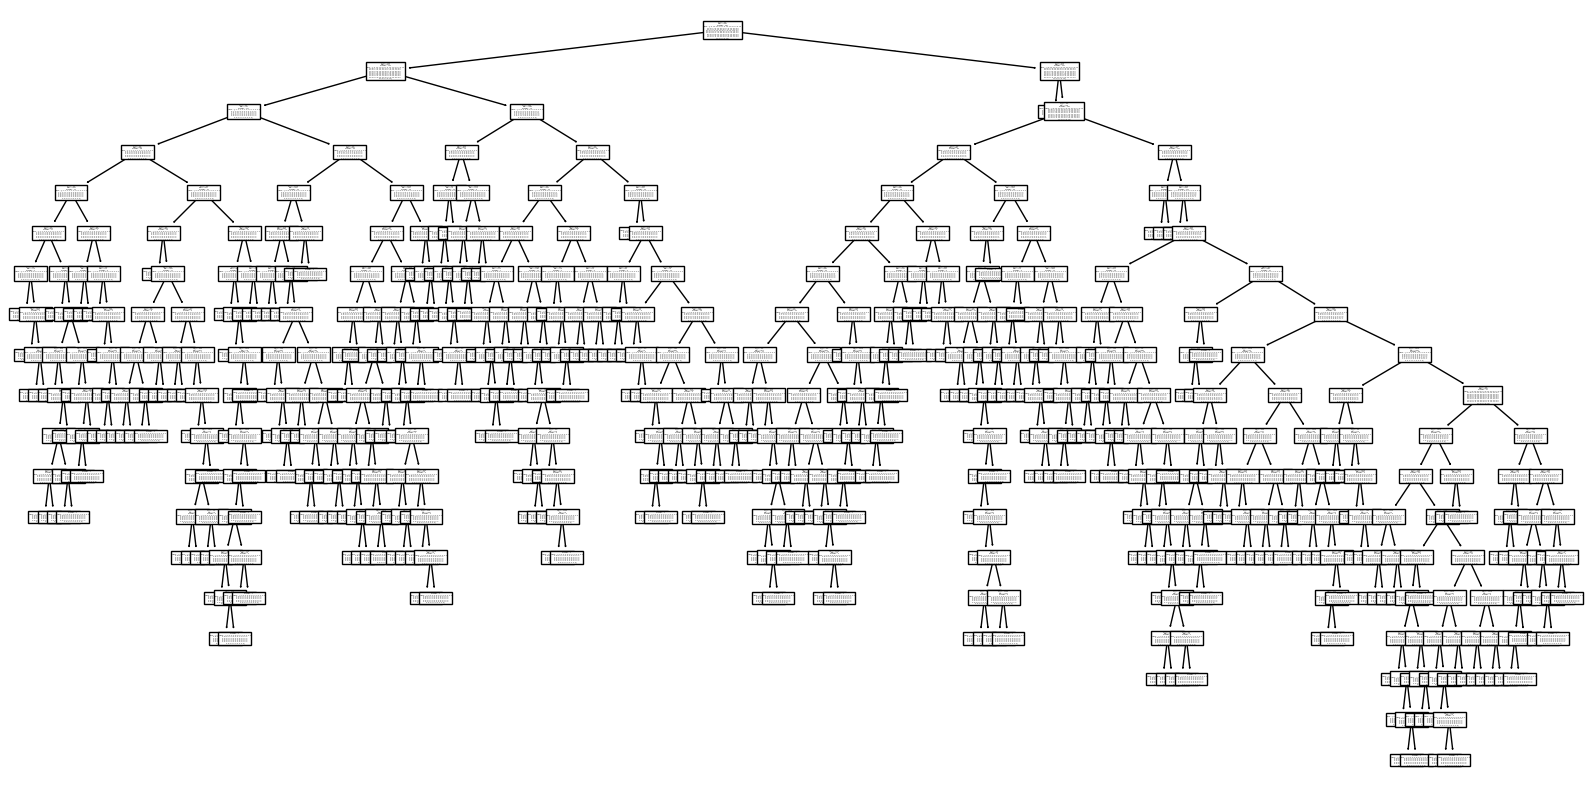

In [36]:
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
df=pd.read_csv("C:/Users/GLOBAL/Downloads/parking_prediction_dataset_v2.csv")
df.head()

,Hour,Day_of_Week,Is_Weekend,Weather,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots
0,6,7,1,Clear,1,196,66,130
1,19,2,1,Cloudy,1,80,80,0
2,14,1,1,Cloudy,0,191,55,136
3,10,4,0,Clear,1,102,59,43
4,7,3,0,Cloudy,0,97,29,68


In [48]:
!pip install gradio


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pandas as pd
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ======================
# Load Dataset
# ======================
df = pd.read_csv("C:/Users/GLOBAL/Downloads/parking_prediction_dataset_v2.csv")

# ======================
# SET TARGET COLUMN HERE
# ======================
TARGET_COLUMN = "Parking_Capacity"   # 🔴 CHANGE if needed

# ======================
# Preprocessing
# ======================
# Convert categorical columns to dummies
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# ======================
# Prediction Function
# ======================
def predict_parking(*inputs):
    input_df = pd.DataFrame([inputs], columns=X.columns)
    prediction = model.predict(input_df)[0]
    return f"🅿️ Predicted Parking Value: {prediction:.2f}"

# ======================
# Gradio Inputs (AUTO)
# ======================
inputs = []
for col in X.columns:
    inputs.append(gr.Number(label=col))

# ======================
# Gradio Interface
# ======================
iface = gr.Interface(
    fn=predict_parking,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="🅿️ Parking Occupancy Prediction App",
    description="Predict parking occupancy/availability using machine learning."
)

iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://bdb1dbaeb5d0180d98.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio\flagged\dataset1.csv


In [59]:
pip install fastapi uvicorn gradio



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
def predict_parking(cars, hour):
    # your ML model logic here
    if cars > 50 and hour in range(8, 18):
        return "Parking Full"
    return "Parking Available"

In [61]:
import gradio as gr

gradio_app = gr.Interface(
    fn=predict_parking,
    inputs=[
        gr.Number(label="Number of Cars"),
        gr.Number(label="Hour of Day")
    ],
    outputs="text",
    title="Parking Availability Predictor"
)


In [62]:
from fastapi import FastAPI
import gradio as gr

app = FastAPI()

# Mount Gradio app
app = gr.mount_gradio_app(
    app,
    gradio_app,
    path="/gradio"
)


new /gradio


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:/Users/GLOBAL/Downloads/parking_prediction_dataset_v2.csv')
df.head()
df.shape

(500, 8)

In [4]:
df['Weather'].unique()

array(['Clear', 'Cloudy', 'Rainy'], dtype=object)

In [5]:
df['Weather'].value_counts()

Weather
Clear     172
Rainy     166
Cloudy    162
Name: count, dtype: int64

In [6]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [7]:
df_encoded.head()

,Hour,Day_of_Week,Is_Weekend,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots,Weather_Cloudy,Weather_Rainy
0,6,7,1,1,196,66,130,False,False
1,19,2,1,1,80,80,0,True,False
2,14,1,1,0,191,55,136,True,False
3,10,4,0,1,102,59,43,False,False
4,7,3,0,0,97,29,68,True,False


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [24]:
df_encoded_scaler = scaler.fit_transform(df_encoded)

In [25]:
df_pca = pca.fit_transform(df_encoded_scaler)

In [26]:
df_pca.shape

(500, 2)

In [27]:
df_pca

array([[ 6.93851592e-01,  1.37040102e+00],
       [-2.51578430e+00, -2.66344286e-01],
       [ 1.34553808e+00,  1.48269797e+00],
       [-6.87089267e-01, -4.33501691e-01],
       [ 1.28846543e+00, -1.44188893e+00],
       [ 1.47268500e-01,  3.64141882e-02],
       [ 1.93680658e+00, -2.19290870e-01],
       [ 5.75904796e-01,  6.29691536e-01],
       [-1.20524343e-01,  8.58406857e-02],
       [ 1.85285148e+00, -8.98436951e-01],
       [ 9.61587210e-01,  4.10222750e-02],
       [-1.95373267e+00, -6.99183099e-01],
       [ 3.88678643e-01, -2.30366453e-01],
       [ 2.44474975e+00, -7.74145255e-01],
       [ 5.07816446e-02, -2.75737784e-01],
       [-9.75138340e-01,  1.13456956e+00],
       [ 3.45385863e-01,  1.22211113e+00],
       [-2.20825538e-01,  8.13262294e-01],
       [-1.83261568e+00,  2.80268927e+00],
       [ 3.90540789e-01,  5.07431381e-01],
       [-2.30873700e+00, -3.99457526e-01],
       [ 1.66774600e+00, -4.75236137e-01],
       [ 3.09057741e+00,  5.99796607e-01],
       [ 6.

In [30]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [31]:
labels = kmeans.fit_predict(df_pca)
print(labels)

[1 2 1 2 1 1 1 1 2 1 1 2 1 1 2 0 0 0 0 1 2 1 1 2 1 1 2 0 0 2 1 1 0 1 1 0 0
 2 1 1 2 1 2 0 1 0 2 2 0 2 0 1 1 2 0 2 2 2 2 2 0 2 0 1 1 2 1 0 2 1 0 0 2 1
 1 2 0 2 1 2 2 0 1 0 0 2 2 0 0 0 1 2 0 0 0 1 0 2 1 1 1 0 0 2 2 2 2 2 1 2 2
 1 0 1 2 1 0 1 1 1 2 0 2 2 2 2 1 0 1 1 2 1 2 1 2 2 1 0 1 1 0 2 2 0 0 0 0 2
 0 2 1 0 1 2 2 2 2 1 1 0 2 1 1 2 0 2 0 0 2 2 0 2 1 1 0 0 1 0 1 2 2 2 1 2 2
 1 2 2 2 2 0 1 2 0 0 0 2 0 2 0 2 1 2 1 2 2 2 2 0 0 0 1 2 1 2 1 1 1 0 2 1 2
 2 0 1 0 1 2 1 1 0 1 2 0 1 1 2 2 2 1 2 0 1 0 0 2 0 1 2 2 1 0 1 1 1 2 0 1 1
 2 1 0 0 2 2 1 0 1 2 1 1 2 2 2 2 2 2 1 2 0 0 0 1 0 0 1 2 1 1 1 1 2 0 0 2 2
 0 0 1 1 2 1 2 1 2 1 1 2 0 0 2 2 2 1 1 0 2 2 0 0 0 0 0 0 2 0 1 0 2 2 1 2 2
 0 1 1 2 0 1 1 1 2 2 1 2 1 1 1 1 0 0 1 0 1 1 1 0 2 1 1 1 1 1 2 1 2 1 0 2 2
 0 1 1 1 2 1 1 1 0 0 2 2 1 2 2 2 2 0 2 1 1 1 1 2 1 1 2 0 0 2 0 1 2 0 0 2 2
 0 0 0 0 2 2 2 2 1 1 2 0 1 2 1 1 1 1 1 0 1 2 0 2 0 0 0 0 1 2 0 0 0 2 1 2 1
 1 2 2 1 2 2 2 2 0 1 0 0 1 2 2 0 0 0 1 2 0 2 2 2 0 1 0 0 1 2 1 1 0 1 1 2 1
 2 2 2 2 2 2 1 1 2 2 0 2 

In [32]:
df_encoded['Cluster_Class'] = labels
df_encoded['Cluster_Class']

0      1
1      2
2      1
3      2
4      1
      ..
495    2
496    2
497    2
498    0
499    1
Name: Cluster_Class, Length: 500, dtype: int32

In [33]:
df_encoded.head()

,Hour,Day_of_Week,Is_Weekend,Nearby_Event,Parking_Capacity,Occupied_Spots,Available_Spots,Weather_Cloudy,Weather_Rainy,Cluster_Class
0,6,7,1,1,196,66,130,False,False,1
1,19,2,1,1,80,80,0,True,False,2
2,14,1,1,0,191,55,136,True,False,1
3,10,4,0,1,102,59,43,False,False,2
4,7,3,0,0,97,29,68,True,False,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df_encoded.drop('Cluster_Class', axis=1)
y = df_encoded['Cluster_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 5)


In [35]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
y_predict_knn = knn.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
print(accuracy_score(y_test, y_predict_knn))

0.88


In [39]:
print(confusion_matrix(y_test, y_predict_knn))

[[24  1  1]
 [ 2 31  0]
 [ 4  4 33]]


In [40]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.86      0.94      0.90        33
           2       0.97      0.80      0.88        41

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel = 'rbf')

In [43]:
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_predict_svc = svc.predict(X_test_scaled)
print(accuracy_score(y_test, y_predict_svc))

0.98


In [45]:
print(confusion_matrix(y_test, y_predict_svc))

[[25  0  1]
 [ 0 33  0]
 [ 0  1 40]]


In [46]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      1.00      0.99        33
           2       0.98      0.98      0.98        41

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

